# Breakdown of this notebook:
1. **Loading the dataset:** Load the data and import the libraries. <br>
2. **Data Cleaning:** <br>
 - Deleting redundant columns.
 - Renaming the columns.
 - Dropping duplicates.
 - Cleaning individual columns.
 - Remove the NaN values from the dataset
 - Some Transformations
3. **Regression Analysis**
 - Linear Regression
 - Decision Tree Regression
 - Random Forest Regression
4. **Data Visualization:** Using plots to find relations between the features.
 - Restaurants delivering Online or not
 - Restaurants allowing table booking or not
 - Table booking Rate vs Rate
 - Best Location
 - Relation between Location and Rating
 - Restaurant Type
 - Gaussian Rest type and Rating
 - Types of Services
 - Relation between Type and Rating
 - Cost of Restuarant
 - No. of restaurants in a Location
 - Restaurant type
 - Most famous restaurant chains in Bengaluru 

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
#reading the dataset
data=pd.read_csv("zomato.csv")
data.head(3) # prints the first 5 rows of a DataFrame

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [3]:
data.shape

(51717, 17)

In [4]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [7]:
data.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'},inplace=True)

In [8]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [9]:
zomato_data = data.copy()

In [10]:
zomato_data.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [11]:
#Removing the Duplicates
zomato_data.duplicated().sum()
zomato_data.drop_duplicates(inplace=True)
zomato_data.head() 

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [12]:
zomato_data.drop(['url','address','dish_liked','phone','cuisines','menu_item','reviews_list'],axis = 1,inplace=True)

In [13]:
zomato_data.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cost,type,city
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,800,Buffet,Banashankari


In [14]:
zomato_data.isnull().sum()

name               0
online_order       0
book_table         0
rate            7775
votes              0
location          21
rest_type        227
cost             346
type               0
city               0
dtype: int64

In [15]:
zomato_data.dropna(how='any',inplace=True)
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43541 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          43541 non-null  object
 1   online_order  43541 non-null  object
 2   book_table    43541 non-null  object
 3   rate          43541 non-null  object
 4   votes         43541 non-null  int64 
 5   location      43541 non-null  object
 6   rest_type     43541 non-null  object
 7   cost          43541 non-null  object
 8   type          43541 non-null  object
 9   city          43541 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.7+ MB


In [16]:
zomato_data['name']=zomato_data['name'].str.title()

In [17]:
zomato_data['online_order'].replace(('Yes','No'),(True,False),inplace = True)
zomato_data['book_table'].replace(('Yes','No'),(True,False),inplace = True)

In [18]:
zomato_data['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [19]:
zomato_data.shape

(43541, 10)

In [20]:
zomato_data['rate']=zomato_data['rate'].str.replace('/5','')
zomato_data = zomato_data[zomato_data['rate'] != 'NEW']
zomato_data = zomato_data[zomato_data['rate'] != '-'].reset_index(drop = True)

In [21]:
zomato_data.shape

(41271, 10)

In [22]:
zomato_data['cost'].dtype

dtype('O')

In [23]:
zomato_data['cost'] = zomato_data['cost'].str.replace(',','.')
zomato_data['cost'] = zomato_data['cost'].astype('float64')

In [24]:
zomato_data['cost'].dtype

dtype('float64')

In [25]:
zomato_data.head(1)

,name,online_order,book_table,rate,votes,location,rest_type,cost,type,city
0,Jalsa,True,True,4.1,775,Banashankari,Casual Dining,800.0,Buffet,Banashankari


In [26]:
zomato_data.drop('name',axis =1,inplace=True)

In [27]:
zomato_data.head(1)

,online_order,book_table,rate,votes,location,rest_type,cost,type,city
0,True,True,4.1,775,Banashankari,Casual Dining,800.0,Buffet,Banashankari


In [28]:
zomato_EDA = zomato_data.copy()

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()
zomato_data['online_order'] =  le.fit_transform(zomato_data['online_order'])
zomato_data['book_table']   =  le.fit_transform(zomato_data['book_table'])
zomato_data['location']     =  le.fit_transform(zomato_data['location'])
zomato_data['rest_type']    =  le.fit_transform(zomato_data['rest_type'])
zomato_data['type']         =  le.fit_transform(zomato_data['type'])
zomato_data['city']         =  le.fit_transform(zomato_data['city'])

In [31]:
zomato_data.head(3)

,online_order,book_table,rate,votes,location,rest_type,cost,type,city
0,1,1,4.1,775,1,24,800.0,0,1
1,1,0,4.1,787,1,24,800.0,0,1
2,1,0,3.8,918,1,19,800.0,0,1


### Data Visualization¶

Text(0.5, 1.0, 'Restaurants delivering online or Not')

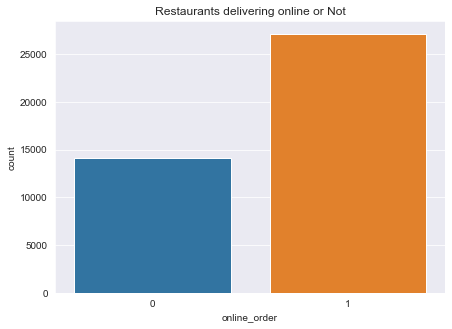

In [32]:
#Restaurants delivering Online or not
plt.figure(figsize=(7,5))
sns.countplot(zomato_data['online_order'])
plt.title('Restaurants delivering online or Not')

### Restaurants allowing table booking or not

Text(0.5, 1.0, 'Restaurants allowing table booking or not')

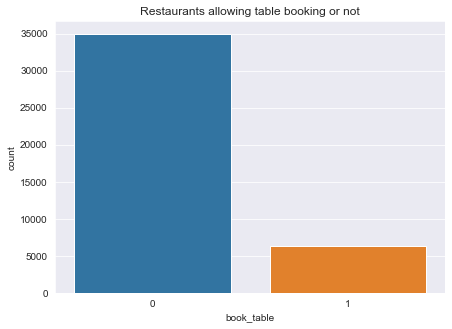

In [33]:
plt.figure(figsize=(7,5))
sns.countplot(zomato_data['book_table'])
plt.title('Restaurants allowing table booking or not')

### Table booking Rate vs Normal Rate

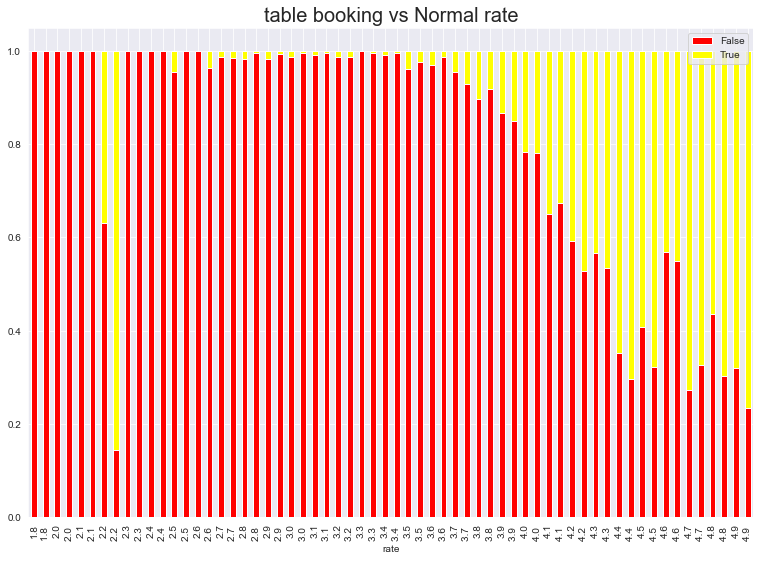

In [34]:
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(zomato_EDA['rate'], zomato_EDA['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','yellow'])
plt.title('table booking vs Normal rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

### Location

Text(0.5, 1.0, 'NO. of restaurants in a Location')

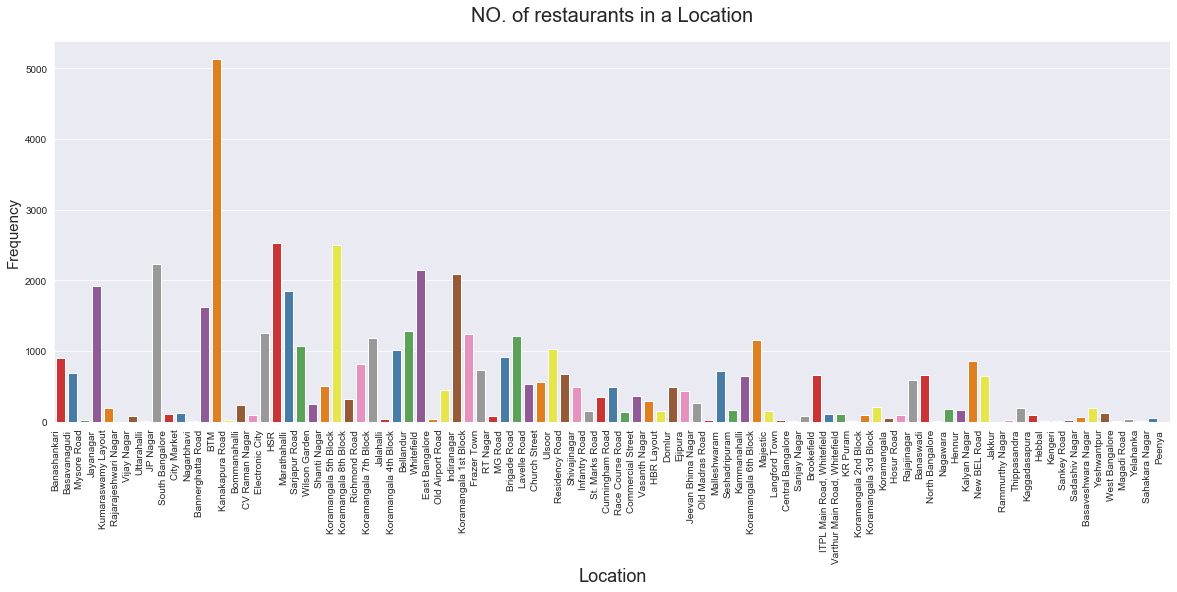

In [35]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=data, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)


Text(0.5, 1.0, 'Location wise count for restaurants')

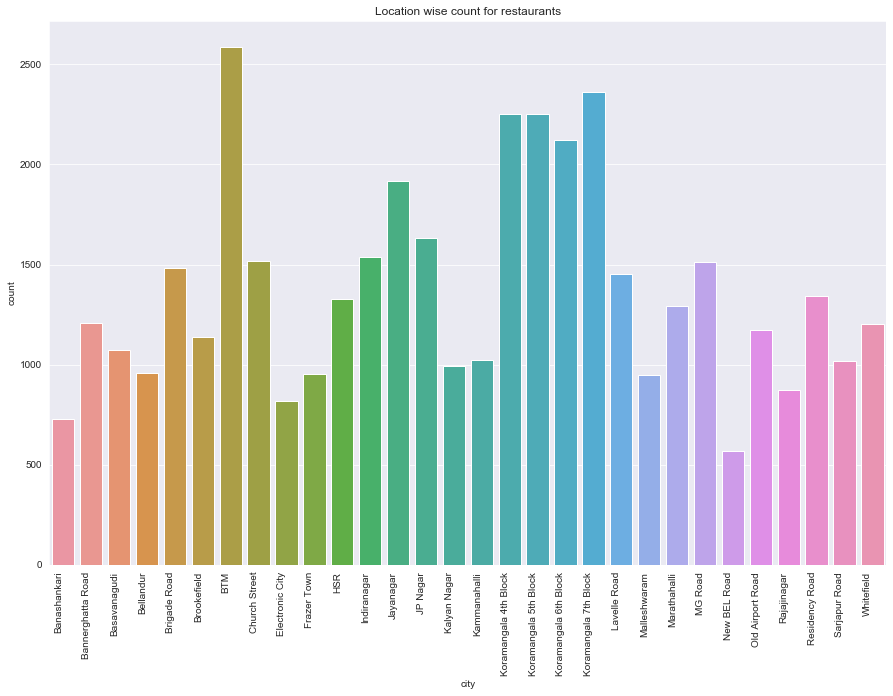

In [36]:
plt.figure(figsize=(15,10))
loc = sns.countplot(zomato_EDA['city'])
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.title('Location wise count for restaurants')

### Location and Rating

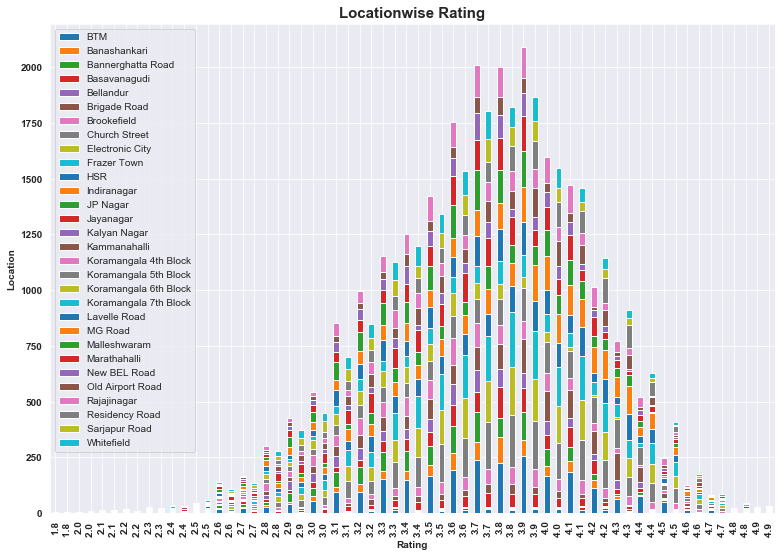

In [37]:
loc_plt=pd.crosstab(zomato_EDA['rate'],zomato_EDA['city']).plot(kind='bar',stacked=True)
plt.title('Locationwise Rating',fontsize=15,fontweight='bold')
plt.ylabel('Location',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend();

### Restaurant Type

Text(0.5, 1.0, 'Restuarant Type')

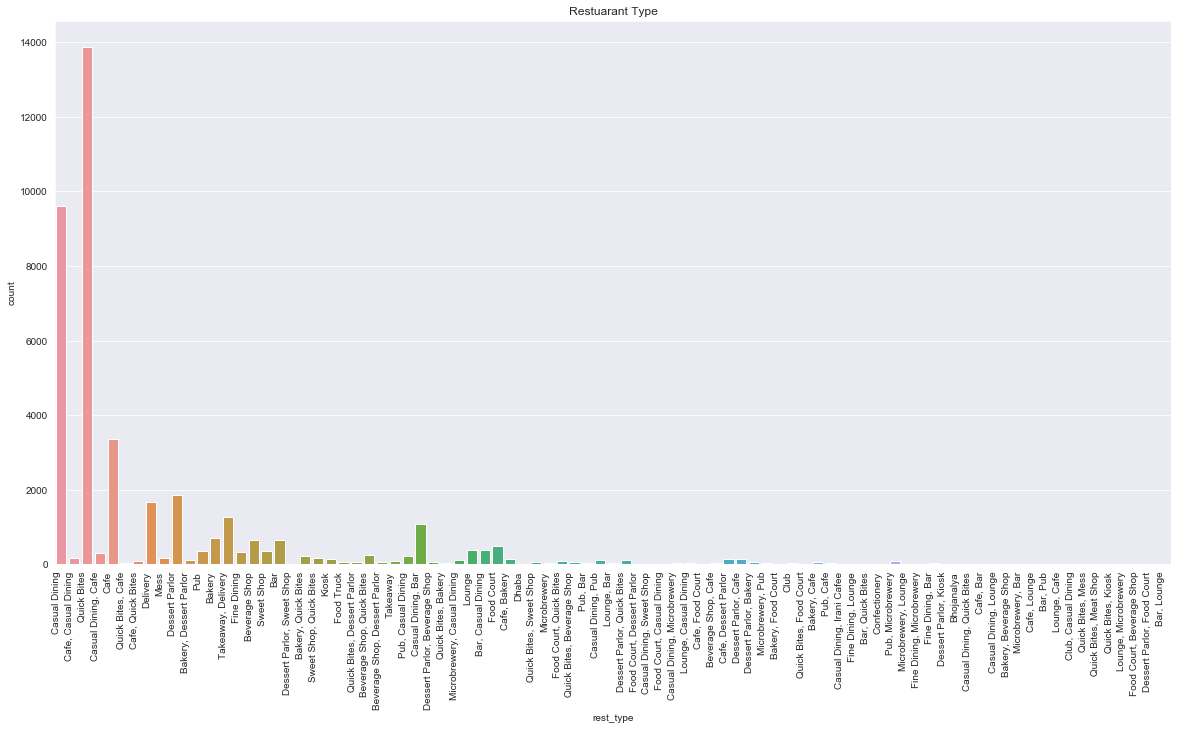

In [38]:
plt.figure(figsize=(20,10))
loc = sns.countplot(zomato_EDA['rest_type'])
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")

plt.title('Restuarant Type')

### Gaussian Rest type and Rating


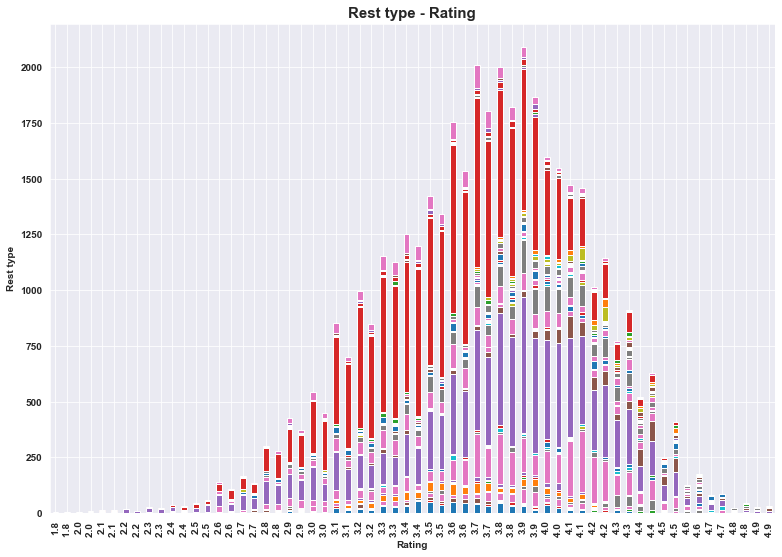

In [39]:
loc_plt=pd.crosstab(zomato_EDA['rate'],zomato_EDA['rest_type'])
loc_plt.plot(kind='bar',stacked=True);
plt.title('Rest type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Rest type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

### Types of Services¶

Text(0.5, 1.0, 'Type of Service')

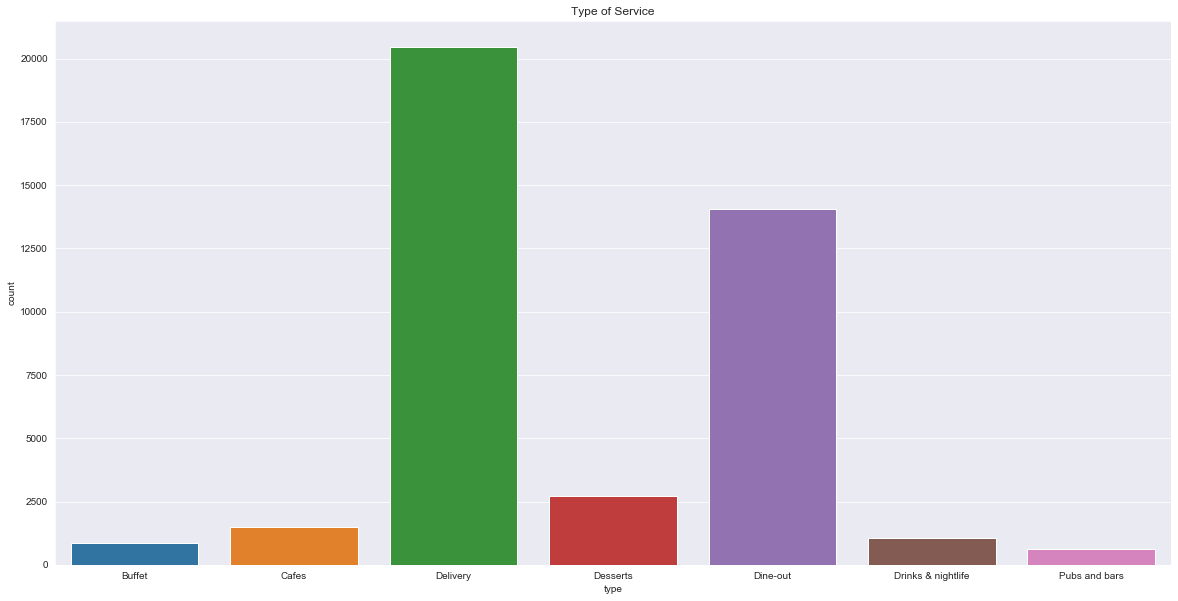

In [40]:
plt.figure(figsize=(20,10))
sns.countplot(zomato_EDA['type'])
plt.title('Type of Service')

### Type and Rating

<Figure size 1440x2160 with 0 Axes>

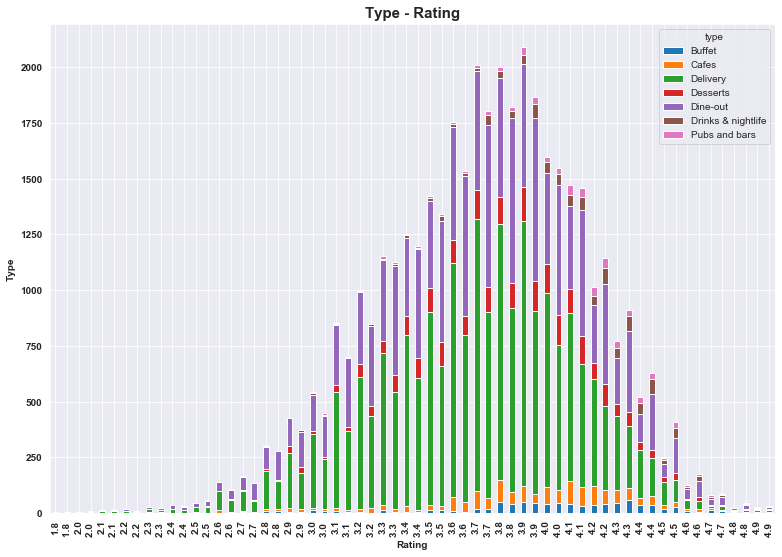

In [41]:
plt.figure(figsize=(20,30))
type_plt=pd.crosstab(zomato_EDA['rate'],zomato_EDA['type'])
type_plt.plot(kind='bar',stacked=True);
plt.title('Type - Rating',fontsize=15,fontweight='bold')
plt.ylabel('Type',fontsize=10,fontweight='bold')
plt.xlabel('Rating',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');

### Cost of Restuarant

Text(0.5, 1.0, 'Cost of Restuarant')

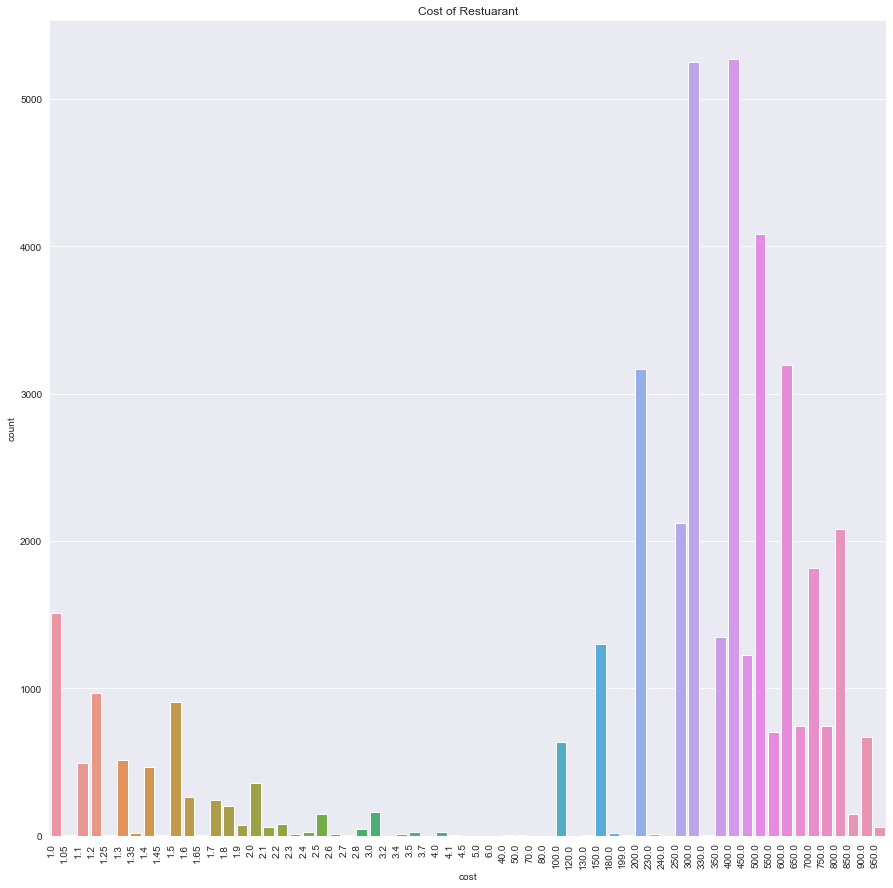

In [42]:
sns.countplot(zomato_data['cost'])
sns.countplot(zomato_data['cost']).set_xticklabels(sns.countplot(zomato_data['cost']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')

### No. of Restaurants in a Location

Text(0.5, 1.0, 'NO. of restaurants in a Location')

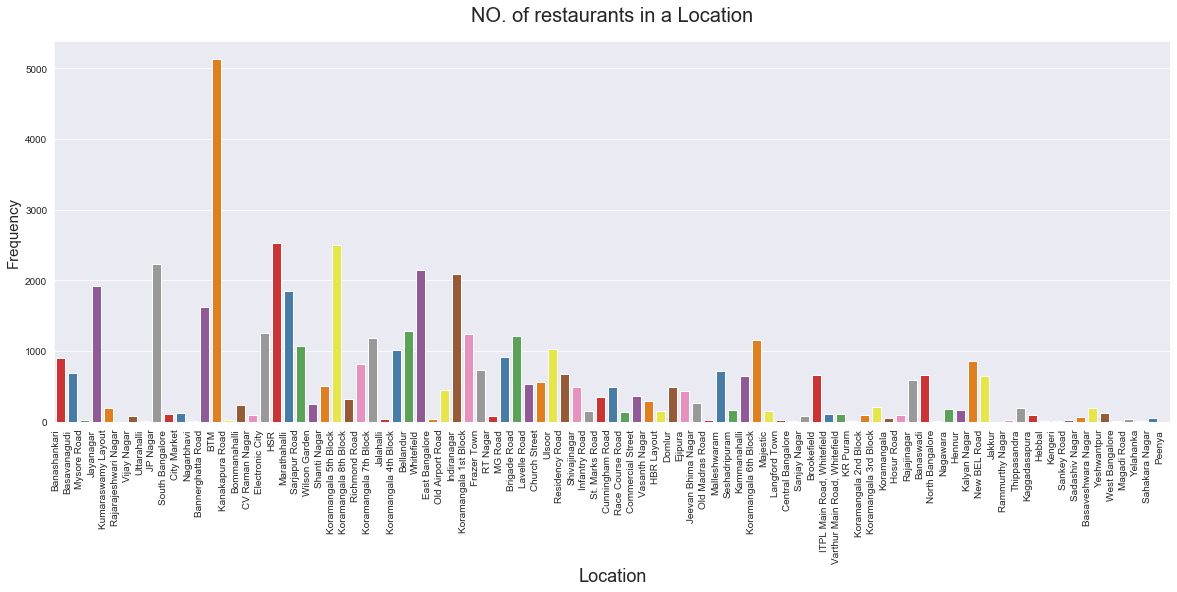

In [43]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="location",data=data, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('NO. of restaurants in a Location',size = 20,pad=20)

### Restaurant type

Text(0.5, 1.0, 'Restaurant types')

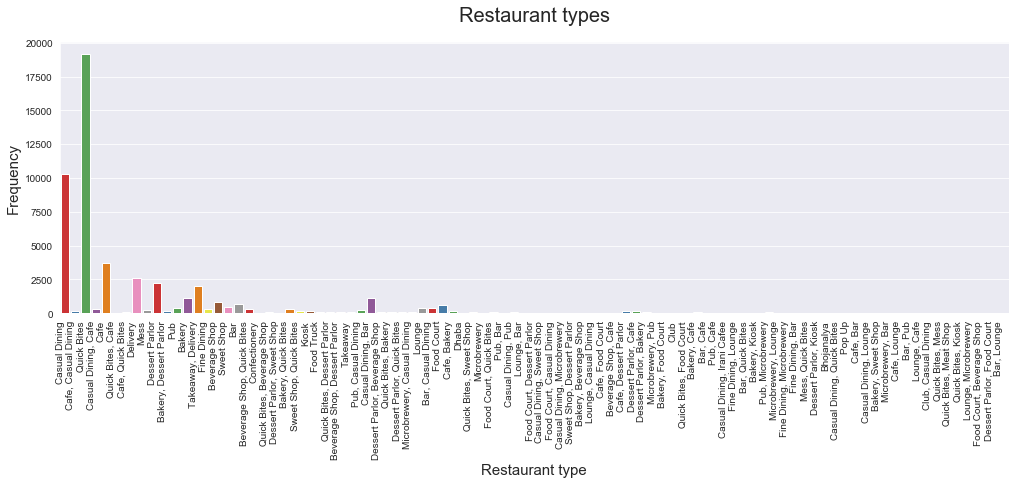

In [44]:
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="rest_type",data=data, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)

### Most famous Restaurant chains in Bengaluru

Text(0.5, 0, 'Number of outlets')

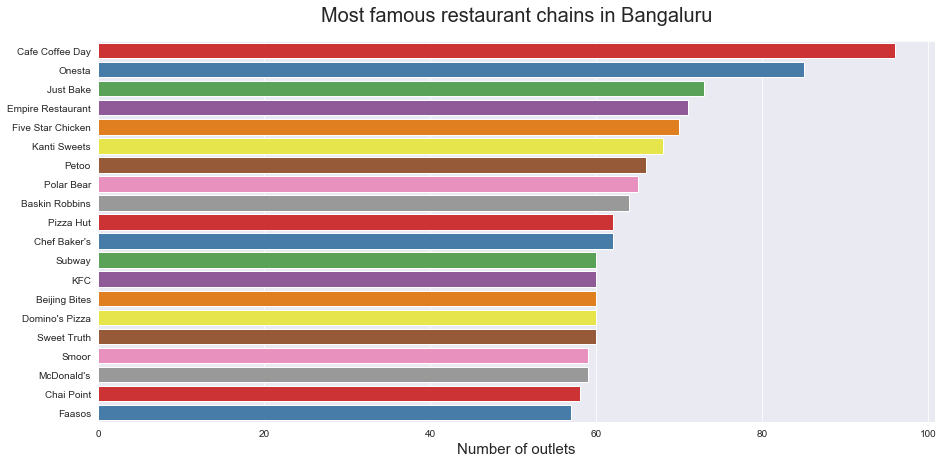

In [45]:
plt.figure(figsize=(15,7))
chains=data['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

### Get Correlation between different variables


In [48]:
zomato_data.corr()

,online_order,book_table,votes,location,rest_type,cost,type,city
online_order,1.000000,-0.054898,-0.013410,-0.074447,0.031118,0.180681,-0.239439,-0.054735
book_table,-0.054898,1.000000,0.393205,0.091573,-0.242420,-0.266658,0.114373,0.025957
votes,-0.013410,0.393205,1.000000,0.048527,-0.143120,-0.116134,0.070507,0.021289
location,-0.074447,0.091573,0.048527,1.000000,-0.062760,-0.067542,0.049628,0.309701
rest_type,0.031118,-0.242420,-0.143120,-0.062760,1.000000,-0.205059,0.035016,0.001091
cost,0.180681,-0.266658,-0.116134,-0.067542,-0.205059,1.000000,-0.155800,-0.025616
type,-0.239439,0.114373,0.070507,0.049628,0.035016,-0.155800,1.000000,0.032803
city,-0.054735,0.025957,0.021289,0.309701,0.001091,-0.025616,0.032803,1.000000


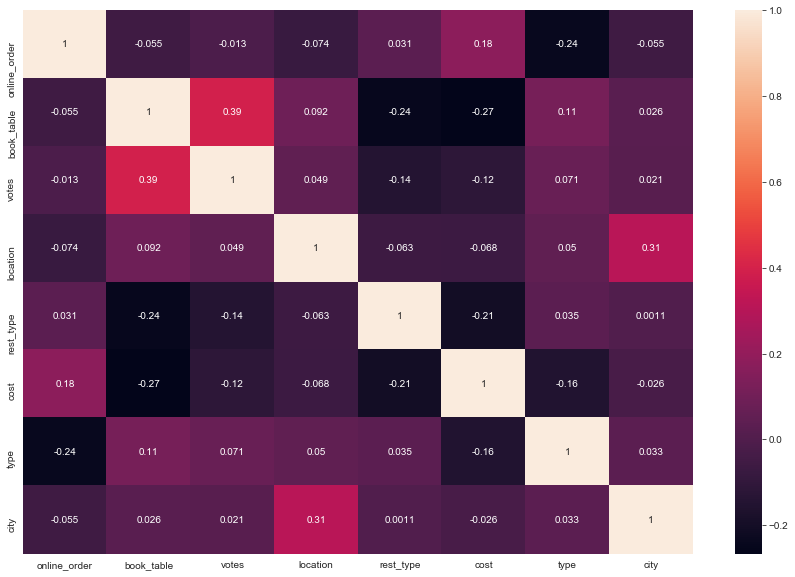

In [49]:
# After data preprocessing
plt.figure(figsize=(15,10))
sns.heatmap(zomato_data.corr(),annot=True)

In [45]:
zomato_data.head()

,online_order,book_table,rate,votes,location,rest_type,cost,type,city
0,1,1,4.1,775,1,24,800.0,0,1
1,1,0,4.1,787,1,24,800.0,0,1
2,1,0,3.8,918,1,19,800.0,0,1
3,0,0,3.7,88,1,73,300.0,0,1
4,0,0,3.8,166,4,24,600.0,0,1


In [46]:
x = zomato_data.iloc[:,:].drop('rate',axis = 1)

In [47]:
y = zomato_data[['rate']]

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test  = train_test_split(x,y,test_size = 0.3,random_state = 1)

In [49]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((28889, 8), (12382, 8), (28889, 1), (12382, 1))

### Model implementation

### Linear Regression

In [50]:
#Prepare a Linear Regression Model
from sklearn.linear_model import LinearRegression

reg=LinearRegression()
reg.fit(X_train,Y_train)

pred_train=reg.predict(X_train)
pred_test=reg.predict(X_test)

from sklearn.metrics import r2_score

print('Train:',r2_score(Y_train,pred_train))
print('Test:',r2_score(Y_test,pred_test))

Train: 0.293534313435308
Test: 0.2851124511339326


### Decision Tree Regression

In [51]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

DTree=DecisionTreeRegressor()
DTree.fit(X_train,Y_train)

pred_train = DTree.predict(X_train)
pred_test  = DTree.predict(X_test)

from sklearn.metrics import r2_score

print('Train:',r2_score(Y_train,pred_train))
print('Test:',r2_score(Y_test,pred_test))

Train: 0.9970764052481674
Test: 0.7785033907571601


In [52]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(X_train,Y_train)

pred_train = DTree.predict(X_train)
pred_test  = DTree.predict(X_test)

from sklearn.metrics import r2_score

print('Train:',r2_score(Y_train,pred_train))
print('Test:',r2_score(Y_test,pred_test))

Train: 0.9306135186819325
Test: 0.7535920065275171


### Random Forest Regression

In [53]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor()
RForest.fit(X_train,Y_train)

pred_train  =  RForest.predict(X_train)
pred_test  =  RForest.predict(X_test)


from sklearn.metrics import r2_score

print('Train:',r2_score(Y_train,pred_train))
print('Test:',r2_score(Y_test,pred_test))


C:\Users\CHALLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Train: 0.9777024407750675
Test: 0.8573890078794468


In [54]:
#Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)
RF.fit(X_train,Y_train)

pred_train  =  RF.predict(X_train)
pred_test   =  RF.predict(X_test)


from sklearn.metrics import r2_score

print('Train:',r2_score(Y_train,pred_train))
print('Test:',r2_score(Y_test,pred_test))


C:\Users\CHALLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Train: 0.9218617833728905
Test: 0.80995686890887


### Extra Tree Regressor

In [55]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor()
ETree.fit(X_train,Y_train)

pred_train  =  ETree.predict(X_train)
pred_test  =  ETree.predict(X_test)

from sklearn.metrics import r2_score

print('Train:',r2_score(Y_train,pred_train))
print('Test:',r2_score(Y_test,pred_test))

C:\Users\CHALLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Train: 0.9970764052481674
Test: 0.8661753288389522


In [56]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(X_train,Y_train)

pred_train  =  ETree.predict(X_train)
pred_test  =  ETree.predict(X_test)

from sklearn.metrics import r2_score

print('Train:',r2_score(Y_train,pred_train))
print('Test:',r2_score(Y_test,pred_test))


C:\Users\CHALLA\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Train: 0.9970764052481674
Test: 0.8657915587896876


In [57]:
import pickle
# Saving model to disk
pickle.dump(RF, open('model.pkl','wb'))

#### It can be observed that we have got the best accuracy for Random forest regressor